### E-mail Classification
Classify emails into spam and not spam

In [58]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
# load datasets
email_class = pd.read_csv('emails.csv', index_col=0)
email_class.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [60]:
# Select first 50 colums
f_50 = email_class.iloc[ :, :50]
# join selected portion with the prediction colum
f_50_pred = pd.concat([f_50, email_class[['Prediction']]], axis=1)
f_50_pred

,the,to,ect,and,for,of,a,you,hou,in,...,any,our,corp,can,d,all,has,was,know,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,21,1,1,39,1,0,0,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,3,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,1,21,0,2,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,1,11,8,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Email 5168,2,2,2,3,0,0,32,0,0,5,...,0,1,0,0,14,0,0,0,0,0
Email 5169,35,27,11,2,6,5,151,4,3,23,...,3,2,0,4,56,3,4,1,1,0
Email 5170,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,2,0,0,0,0,1


In [61]:
# Emails predicted to be spams
spam = email_class[email_class['Prediction']== 1]
len(spam)

# Emails predicted to be not spam
not_spam = email_class[email_class['Prediction']== 0]

In [62]:
# List of columns
cols =list(email_class.columns)


In [63]:
# funtion to group by word length
def len_com(x):
    wc = []
    for col in cols:
        if len(col) == x:
            wc.append(col)
    return list(wc)
            



In [64]:
# Function to count the most common word of the same length
def count_wd(sp_no,len_com):
    df = sp_no[len_com]
    add = np.sum(df, axis=0)
    return add.sort_values(ascending=False)[:11]





In [65]:
# 10 most common word/letter in spams
mosc =  np.sum(f_50_pred, axis=0)
mosc.sort_values(ascending=False)[1:11]

a      287136
i      237177
s      216251
d      125875
on      56560
in      54824
re      47112
or      40078
at      35854
the     34345
dtype: int64

In [66]:
# List of words of diffrent length
two_let = len_com(2)
three_let = len_com(3)
four_let = len_com(4)
five_let = len_com(5)
six_let = len_com(6)
sev_let = len_com(7)



In [67]:
# Most common 2 letter word in spam mails
count_wd(spam, two_let)

in    22871
th    19414
re    18832
on    18810
an    18310
or    14509
he    14473
at    13176
ti    12847
en    12436
al    11336
dtype: int64

In [68]:
# most common 3 letter word in spams
count_wd(spam, three_let)

the    9839
and    6236
you    5019
for    4653
com    4054
our    3950
ect    3719
pro    3140
her    2681
his    2630
men    2608
dtype: int64

In [69]:
# Most common four letter word in spams
count_wd(spam, four_let)

this    2303
your    2096
with    2006
that    1361
here    1295
able    1124
form    1050
http    1007
from     995
mail     921
have     905
dtype: int64

In [70]:
# Most common 5 letter word in spams

count_wd(spam, five_let)

price    763
state    702
lease    648
eight    532
email    527
count    512
stock    507
order    500
enter    463
other    453
offer    382
dtype: int64

In [71]:
# Most common 6 letter word in spams

count_wd(spam, six_let)

invest    621
format    614
inform    565
please    511
height    367
market    326
within    314
report    314
ooking    309
office    270
online    267
dtype: int64

In [72]:
# Most common 7 letter word in spams
count_wd(spam, sev_let)

company    745
product    485
service    350
message    315
contact    270
special    264
looking    256
account    252
provide    238
million    237
forward    226
dtype: int64

In [74]:
# Most common 8 letter word in spams
count_wd(spam, len_com(8))

business    299
national    265
products    224
software    219
customer    205
internet    200
interest    174
material    158
security    148
services    137
complete    130
dtype: int64

<AxesSubplot:xlabel='Prediction', ylabel='count'>

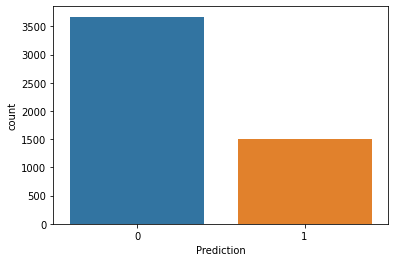

In [73]:
# chart for predictions
sns.countplot(x='Prediction', data=email_class)